<a href="https://colab.research.google.com/github/Priya29satya07/miniproject_1/blob/main/parkinson_mini_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML FRAME WORK FOR DETECTING PD**

In [116]:

import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd # for handling data in the form of tables
import numpy as np # For handling matrix
from sklearn.model_selection import train_test_split # For spliting the data into train and test
from sklearn import metrics # for calculation of accuracy and precision
from sklearn.metrics import confusion_matrix #performance measures
from sklearn import svm
import seaborn as sns#for visualization
from matplotlib import pyplot# for visualization
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier#import decision tree classifier
from sklearn.ensemble import AdaBoostClassifier# import adaboost classifier
from sklearn.ensemble import RandomForestClassifier# import randomforest classifier
from sklearn.metrics import accuracy_score# for calciulating accuracy_score
import matplotlib.pyplot as plt

# **Reading the data**

---








In [117]:
#Read the data
df=pd.read_csv('parkinson.csv')
df.head()# To see the first 5 rows of our dataset we use head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [118]:
df.shape#to know the shape of datafeame

(195, 24)

In [119]:
#To know the columns names in dataset we use columns
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [120]:
# To study the statastical summary of dataset we use discribe()
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# **Checking the null values in dataset**



In [121]:
#To check Whether NA's (missingvalues) present in dataset
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [122]:
#grouping data based on outcomes
print(df.groupby("status").size())
# 0 for healthy person
#1 for person with PD

status
0     48
1    147
dtype: int64


# **Data Visualization**

<Axes: xlabel='status', ylabel='count'>

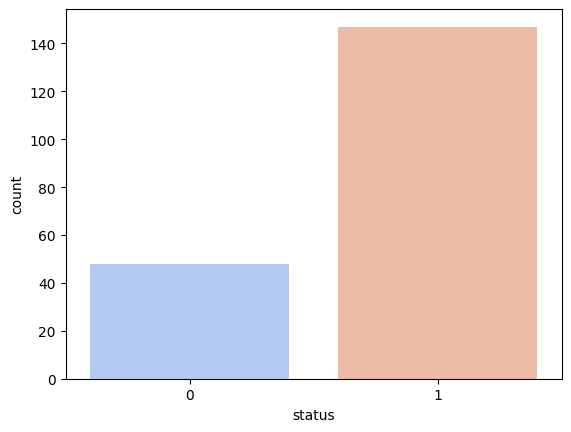

In [159]:
sns.countplot(x='status',data=df,label="Count",palette="coolwarm")# visualizing the count of each element  in outcome column

# **Splitting data**

In [124]:
#Get the features and labels
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [125]:
#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [126]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)
print( "Actual size is:",x.shape )
print("The Training size is:",x_train.shape ,y_train.shape)
print("The Testing size is:",x_test.shape)

Actual size is: (195, 22)
The Training size is: (156, 22) (156,)
The Testing size is: (39, 22)


In [127]:
def confusion_reports(clf):
    # Make predictions on the test data
    preds = clf.predict(x_test)

    # Evaluate the classifier's performance
    print("Classification Report:")
    print(classification_report(y_test, preds))

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, preds, labels=clf.classes_)

    # Create and plot the confusion matrix
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()
    plt.savefig("confusionSVM.png")  # Save the confusion matrix plot

def roc_report(clf):   # Generate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict(x_test))  # Using decision_function for SVM

    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for SVM Classifier')
    plt.legend()
    plt.savefig("rocSVM.png")  # Save the ROC curve plot

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, clf.predict(x_test))  # Use decision_function for SVM
    print('ROC AUC Score:', roc_auc)





# **CLASSIFIERS**

---


# SVM


In [128]:
clf = svm.SVC(kernel='poly',degree=2)
#declaring a variable to svm model

In [129]:
clf.fit(x_train, y_train)#fitting data set into svm model

SVC(degree=2, kernel='poly')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.86      1.00      0.93        32

    accuracy                           0.87        39
   macro avg       0.93      0.64      0.69        39
weighted avg       0.89      0.87      0.84        39



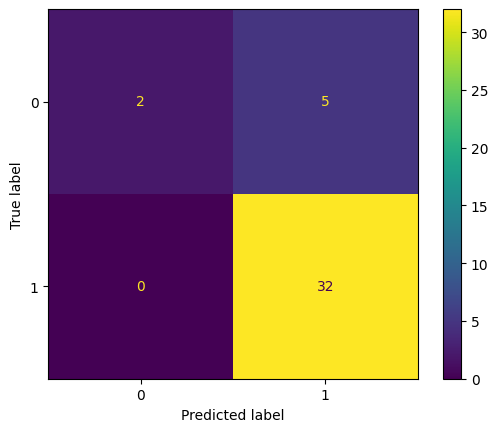

In [130]:
confusion_reports(clf)



ROC AUC Score: 0.6428571428571428


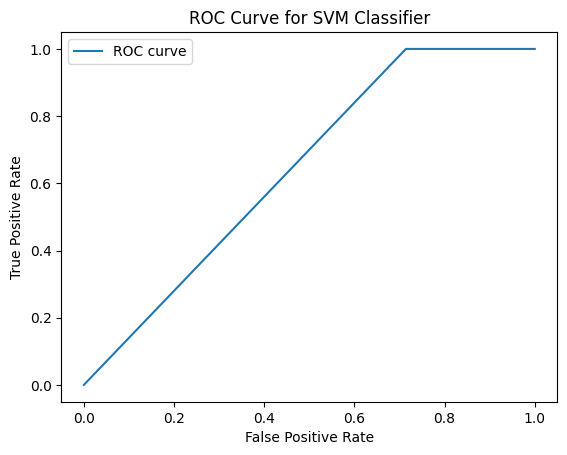

In [131]:
roc_report(clf)

# Decision Tree

In [132]:
#fittting the training set into model
tr = DecisionTreeClassifier()
tr.fit(x_train, y_train)

DecisionTreeClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.97      0.94      0.95        32

    accuracy                           0.92        39
   macro avg       0.86      0.90      0.88        39
weighted avg       0.93      0.92      0.93        39



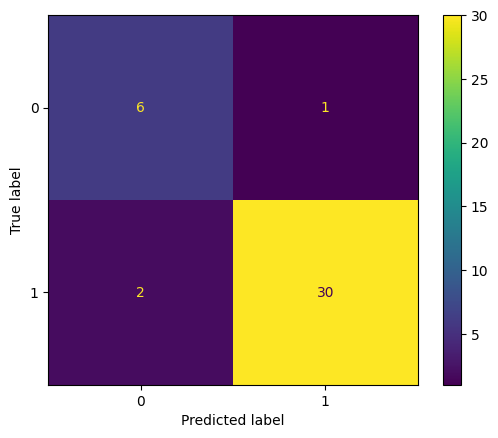

In [133]:
confusion_reports(tr)

ROC AUC Score: 0.8973214285714286


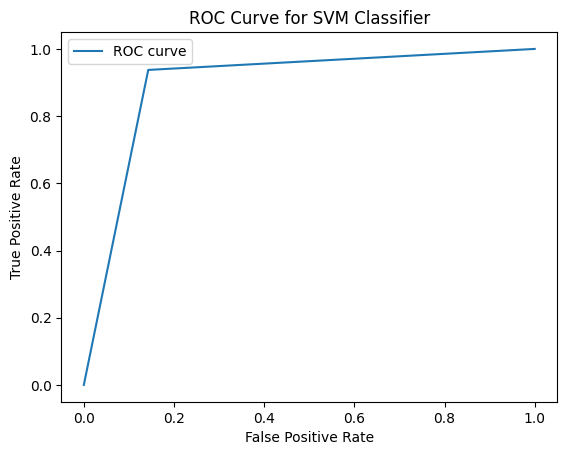

In [134]:
roc_report(tr)

# Random Forest

In [135]:
#fitting our nodel with training sets
ran=RandomForestClassifier(n_estimators=100)
ran.fit(x_train,y_train)

RandomForestClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39



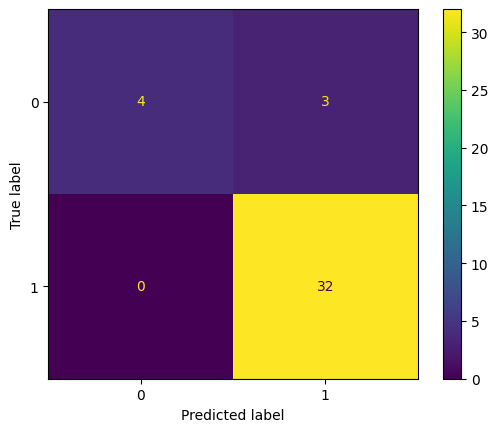

In [136]:
confusion_reports(ran)

ROC AUC Score: 0.7857142857142857


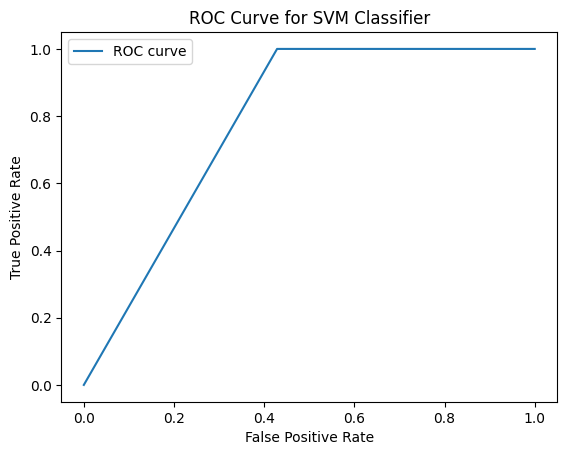

In [137]:
roc_report(ran)

# AdaBoost

In [138]:
#now building  adaboostclassifier on training sets and fitting
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100
)
classifier.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.97      0.94      0.95        32

    accuracy                           0.92        39
   macro avg       0.86      0.90      0.88        39
weighted avg       0.93      0.92      0.93        39



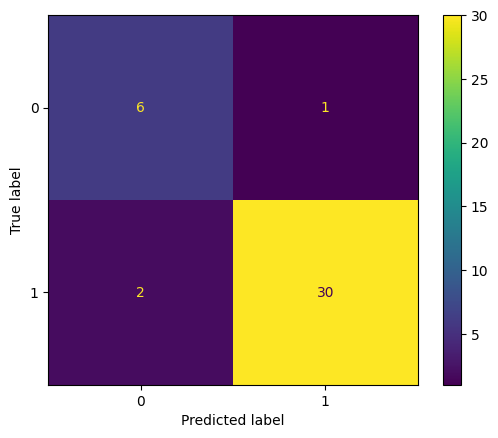

In [139]:
confusion_reports(classifier)

ROC AUC Score: 0.8973214285714286


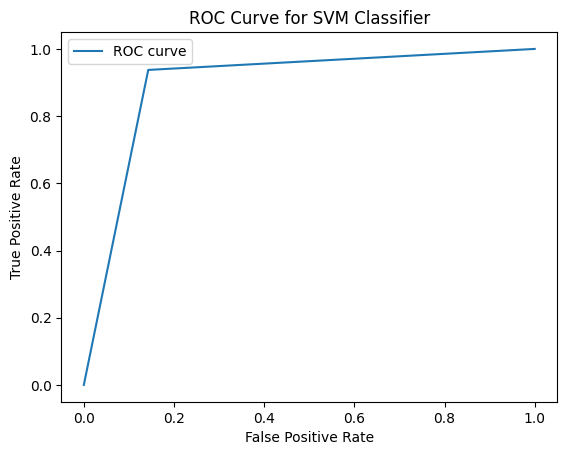

In [140]:
roc_report(classifier)

# KNN

In [143]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=50) #CONSIDERING 50 NEIGHBOURS FOR RESULT CALCULATIONS
knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=50)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.82      1.00      0.90        32

    accuracy                           0.82        39
   macro avg       0.41      0.50      0.45        39
weighted avg       0.67      0.82      0.74        39



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


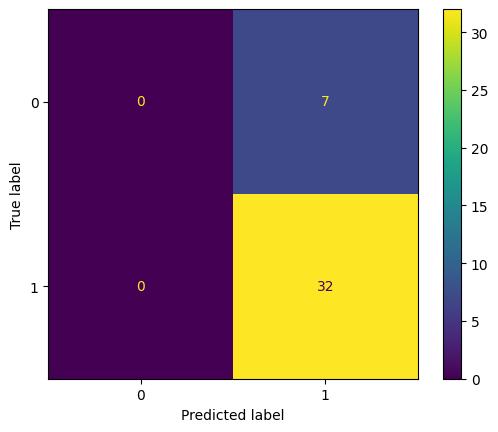

In [144]:
confusion_reports(knc)

ROC AUC Score: 0.5


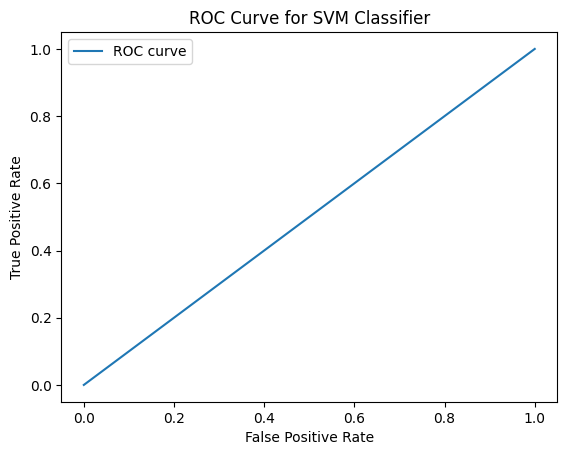

In [145]:
roc_report(knc)

# Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



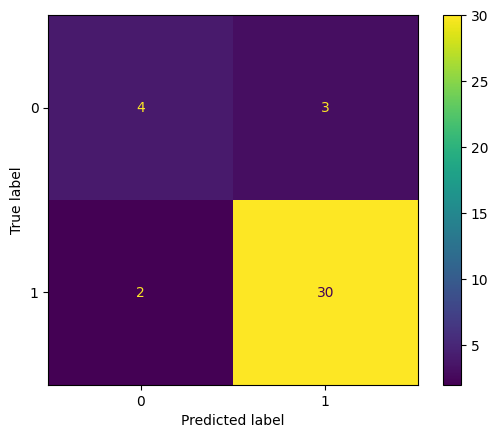

In [147]:
confusion_reports(lrc)

ROC AUC Score: 0.7544642857142856


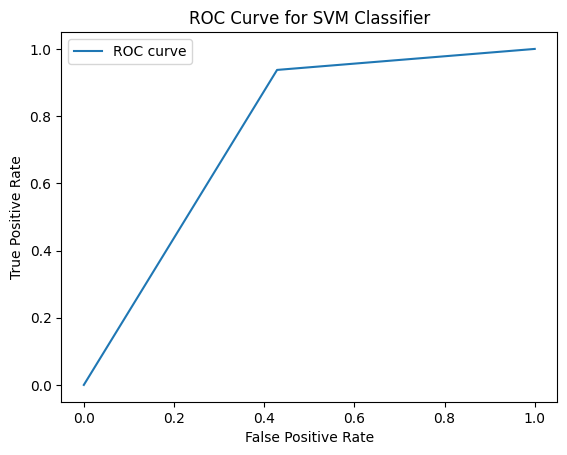

In [148]:
roc_report(lrc)

# Bagging

In [149]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=50)
bc.fit(x_train,y_train)

BaggingClassifier(n_estimators=50)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.89      0.90      0.89        39



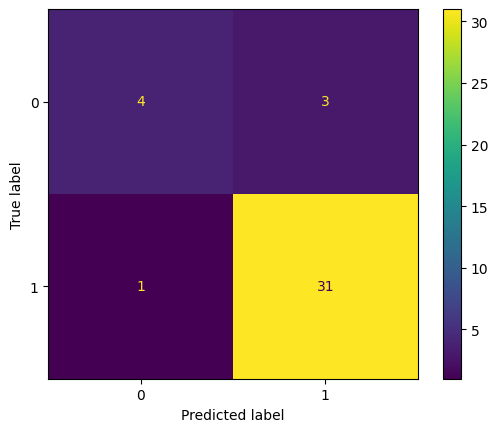

In [150]:
confusion_reports(bc)

ROC AUC Score: 0.7700892857142857


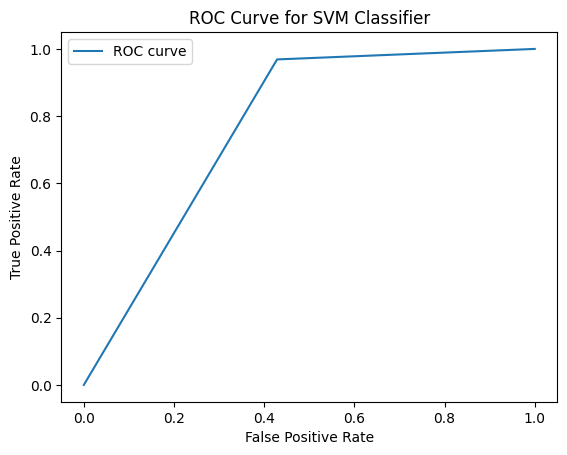

In [151]:
roc_report(bc)

# Xgboost

In [152]:
#Train the model
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



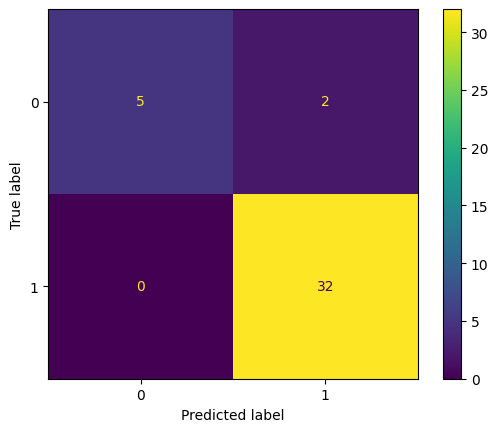

In [153]:
confusion_reports(model)

ROC AUC Score: 0.8571428571428572


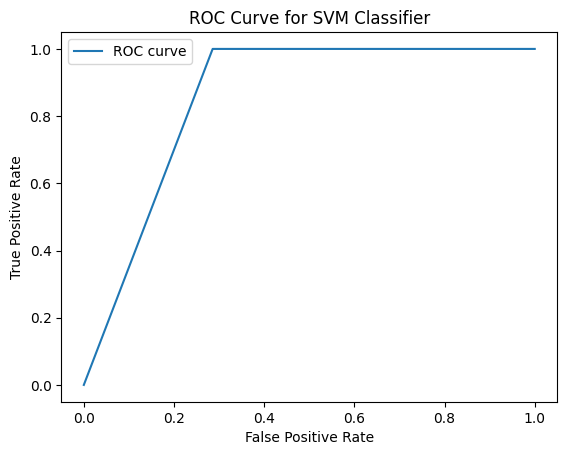

In [154]:
roc_report(model)

In [155]:
#taking the input externally for checking the model
input_data=(203.18400,211.52600,196.16000,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.08500,0.00468,0.00610,
            0.00726,0.01403,0.00065,33.04700,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539)
input_data_as_numarray=np.asarray(input_data)
input_data_reshape=input_data_as_numarray.reshape(1,-1)
std_data=scaler.transform(input_data_reshape)
print(std_data)
prediction=model.predict(std_data)
print(prediction)

# if-else statement
if (prediction[0] == 0):
  print("Person is Healthy")
else:
  print("Person is suffering from PD")


[[ 0.33724938 -0.55344213  0.50476125 -0.99364676 -0.98418972 -0.97495183
  -0.98499464 -0.97463477 -0.99926967 -1.         -0.9949923  -0.98914518
  -0.99892794 -0.99499294 -1.          1.         -0.61035137  0.3355617
  -1.         -0.29203839 -1.         -1.        ]]
[0]
Person is Healthy
